In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
data = pd.read_csv('Dataset/Telco_Customer_Churn_Dataset  (1) (1).csv')

In [21]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [77]:
data.isnull().sum()

SeniorCitizen            0
tenure                   0
MonthlyCharges           0
Churn                    0
customerID_0003-MKNFE    0
                        ..
TotalCharges_997.75      0
TotalCharges_998.1       0
TotalCharges_999.45      0
TotalCharges_999.8       0
TotalCharges_999.9       0
Length: 13602, dtype: int64

In [47]:
# Handle missing values
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [48]:
imputer = SimpleImputer(strategy='median')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [49]:
 # Encode categorical variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [50]:
# Encode the target variable (Churn) as 0 and 1
label_encoder = LabelEncoder()
data['Churn'] = label_encoder.fit_transform(data['Churn'])

In [51]:
# Standardize numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [11]:
#Task 2: Split Data for Training and Testing
# Define features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

In [12]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train.dtypes


SeniorCitizen     float64
tenure            float64
MonthlyCharges    float64
dtype: object

In [27]:
X_train.shape[1]

3

In [33]:
k = min(10, X_train.shape[1])  # Ensures k does not exceed available features
selector = SelectKBest(score_func=f_classif, k=k)

In [30]:
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)



In [36]:
 ## Ensure X_train.columns is used instead of X.columns
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [55]:
# Task 4: Model Selection and Comparison
# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [59]:
# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='roc_auc')
    results[name] = scores.mean()
    print(f"{name} - Mean ROC-AUC: {scores.mean():.4f}")

Logistic Regression - Mean ROC-AUC: 0.8100
Random Forest - Mean ROC-AUC: 0.7706
Gradient Boosting - Mean ROC-AUC: 0.8187


In [60]:
# Select the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Gradient Boosting


In [61]:
# Task 5: Train the Best Model
best_model.fit(X_train_selected, y_train)

GradientBoostingClassifier(random_state=42)

In [62]:
# Task 6: Model Evaluation
y_pred = best_model.predict(X_test_selected)
y_pred_proba = best_model.predict_proba(X_test_selected)[:, 1]

In [78]:
# Calculate evaluation metrics as percentages
accuracy = int(accuracy_score(y_test, y_pred) * 100)
precision = int(precision_score(y_test, y_pred) * 100)
recall = int(recall_score(y_test, y_pred) * 100)
f1 = int(f1_score(y_test, y_pred) * 100)
roc_auc = int(roc_auc_score(y_test, y_pred_proba) * 100)

In [79]:
# Print evaluation metrics as percentages
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"Recall: {recall}%")
print(f"F1-Score: {f1}%")
print(f"ROC-AUC: {roc_auc}%")




Evaluation Metrics:
Accuracy: 79%
Precision: 64%
Recall: 50%
F1-Score: 56%
ROC-AUC: 83%


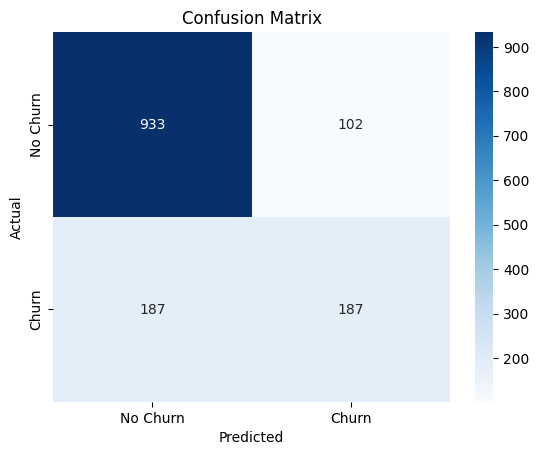

In [80]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

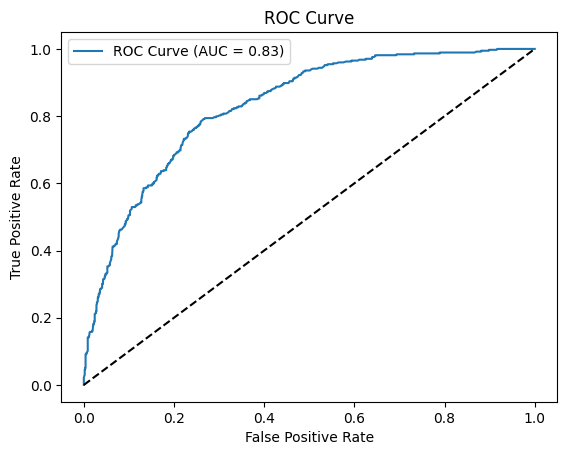

In [81]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc / 100))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

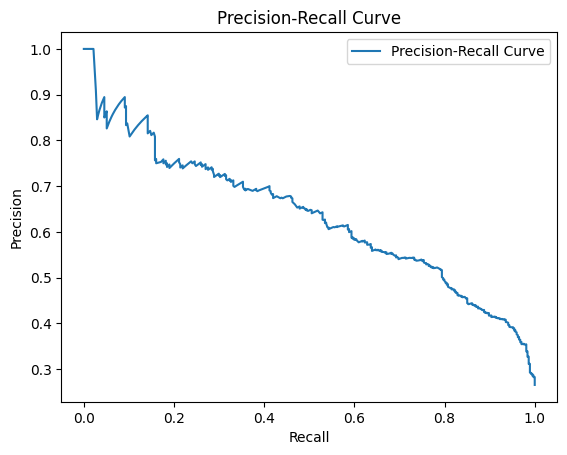

In [82]:
# Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall_vals, precision_vals, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


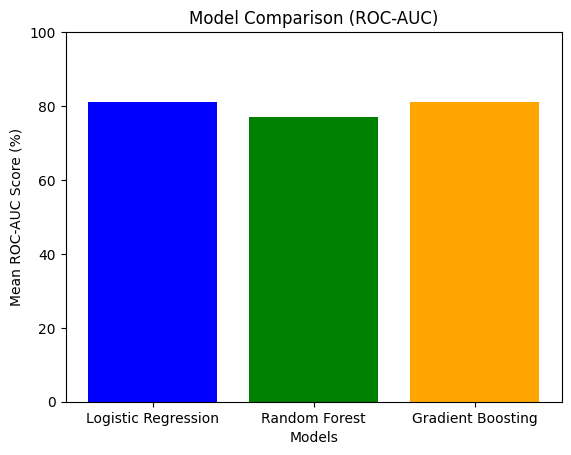

In [83]:
# Model Comparison Bar Plot
plt.bar(results.keys(), [int(val * 100) for val in results.values()], color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Mean ROC-AUC Score (%)')
plt.title('Model Comparison (ROC-AUC)')
plt.ylim(0, 100)
plt.show()